In [26]:
import networkx as net
import matplotlib.pyplot as plot
import pandas as pd

In [27]:
e=net.read_pajek("egypt_retweets.net")

In [28]:
len(e.nodes(data=True))

25178

In [29]:
len(list(net.connected_component_subgraphs(e)))

3122

In [30]:
x=[len(c) for c in net.connected_component_subgraphs(e)]


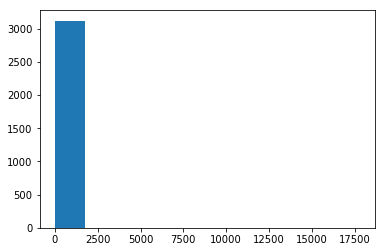

In [31]:
plot.hist(x)
plot.show()

In [32]:
[len(c) for c in net.connected_component_subgraphs(e) if len(c) > 10]

[17762, 64, 16, 13, 11, 11, 14, 16]

In [33]:
def trim_edges(g, weight=1):
    g2=net.Graph()
    for f, to, edata in g.edges(data=True):
        if edata['weight'] > weight:
            g2.add_edge(f,to,edata)
    return g2

In [34]:
e.edges(data=True)

[('partager1973', 'PJCrowley', {'weight': 3.0}),
 ('RaoufRamahy', 'esraa_ali', {'weight': 1.0}),
 ('annaberlin1983', 'arwasm', {'weight': 1.0}),
 ('alexander_drake', 'Colvinius', {'weight': 2.0}),
 ('TwiddleEastNews', 'alaa', {'weight': 1.0}),
 ('TwiddleEastNews', 'ptypk', {'weight': 1.0}),
 ('TwiddleEastNews', 'sharifkouddous', {'weight': 2.0}),
 ('TwiddleEastNews', 'realrissa', {'weight': 1.0}),
 ('TwiddleEastNews', '_Sheri_Lynn_', {'weight': 1.0}),
 ('TwiddleEastNews', 'HerQ10', {'weight': 1.0}),
 ('TwiddleEastNews', 'stand4haq', {'weight': 2.0}),
 ('blackgothchick', 'blackballonline', {'weight': 3.0}),
 ('blackgothchick', 'blackgothchick', {'weight': 1.0}),
 ('MartinaArapovic', 'monaeltahawy', {'weight': 2.0}),
 ('DocsDaisyWoman', 'ArabRevolution', {'weight': 1.0}),
 ('sue_elise', 'BannedBlood', {'weight': 2.0}),
 ('Why0h562', 'Sandmonkey', {'weight': 9.0}),
 ('Why0h562', 'FreeLibyanman', {'weight': 2.0}),
 ('Why0h562', 'ashrafkhalil', {'weight': 1.0}),
 ('Why0h562', 'Tharwacolamus

In [35]:
def island_method(g, iterations=5):
    weights= [edata['weight'] for f,to,edata in g.edges(data=True)]
    mn=int(min(weights))
    mx=int(max(weights))
    print(mx)
    #compute the size of the step, so we get a reasonable step in iterations
    step=int((mx-mn)/iterations)
    return [[threshold, trim_edges(g, threshold)] for threshold in range(mn,mx,step)]

In [36]:
cc=list(net.connected_component_subgraphs(e))[0]
islands=island_method(cc)
for i in islands:
 # print the threshold level, size of the graph, and number of connected components
    print(i[0], len(i[1]), len(list(net.connected_component_subgraphs(i[1]))))

306
1 12360 314
62 27 11
123 8 3
184 5 2
245 5 2


In [37]:
list(net.connected_component_subgraphs(e))[0]

In [38]:
range(1,20,2)

range(1, 20, 2)

In [39]:
list(net.ego_graph(cc,'justinbieber'))

['justinbieber',
 'kokiJesseJB',
 'jtvanderb',
 'CitrusDoBieber',
 'Gainsvoourg',
 'beccahorner1211',
 'trabolsia',
 'Nivo98',
 'Bieberluuver4',
 'justinbiebaer',
 'mattei_sandra',
 'IBiebeira',
 'TheTeenagersFR',
 'CaseyDre']

In [40]:
list(net.Graph(net.ego_graph(cc,'justinbieber', radius=2)))

['justinbieber',
 'kokiJesseJB',
 'jtvanderb',
 'CitrusDoBieber',
 'Gainsvoourg',
 'beccahorner1211',
 'trabolsia',
 'Nivo98',
 'Bieberluuver4',
 'justinbiebaer',
 'mattei_sandra',
 'IBiebeira',
 'TheTeenagersFR',
 'CaseyDre',
 'todayshow',
 'travisbarker',
 'DJMeddi',
 'MarElhad',
 'ChangeInLibya',
 'OmarAlmu5tar',
 'ShababLibya',
 'LianaMariaa']

In [41]:
list(cc.subgraph('Ghonim'))

['Ghonim']

In [42]:
cc.neighbors('justinbieber')

['kokiJesseJB',
 'jtvanderb',
 'CitrusDoBieber',
 'Gainsvoourg',
 'beccahorner1211',
 'trabolsia',
 'Nivo98',
 'Bieberluuver4',
 'justinbiebaer',
 'mattei_sandra',
 'IBiebeira',
 'TheTeenagersFR',
 'CaseyDre']

In [43]:
ter =pd.read_csv("https://raw.githubusercontent.com/maksim2042/SNABook/master/chapter4/9_11_edgelist.txt",header=None)

In [44]:
g=net.Graph()
for index,line in ter.iterrows():
    #print(line[0])
    g.add_edge(line[0],line[1],weight=line[2],conf=line[3])

In [45]:
g.nodes()

['Hani Hanjour',
 'Majed Moqed',
 'Nawaf Alhazmi',
 'Khalid Al-Mihdhar',
 'Lotfi Raissi',
 'Bandar Alhazmi',
 'Rayed Mohammed Abdullah',
 'Salem Alhazmi',
 'Hamza Alghamdi',
 'Ahmed Alnami',
 'Saeed Alghamdi',
 'Abdussattar Shaikh',
 'Osama Awadallah',
 'Mohamed Atta',
 'Abdul Aziz Al-Omari',
 'Marwan Al-Shehhi',
 'Ziad Jarrah',
 'Said Bahaji',
 'Ramzi Bin al-Shibh',
 'Zakariya Essabar',
 'Essid Sami Ben Khemais',
 'Waleed Alshehri',
 'Wail Alshehri',
 'Satam Suqami',
 'Fayez Ahmed',
 'Mohand Alshehri',
 'Mustafa Ahmed al-Hisawi',
 'Ahmed Alghamdi',
 'Ahmed Al Haznawi',
 'Zacarias Moussaoui',
 'Djamal Beghal',
 'Jerome Courtaillier',
 'David Courtaillier',
 'Ahmed Ressam',
 'Kamel Daoudi',
 'Tarek Maaroufi',
 'Faisal Al Salmi',
 'Mohamed Abdi',
 'Mamoun Darkazanli',
 'Ahmed Khalil Ibrahim Samir Al-Ani',
 'Agus Budiman',
 'Mounir El Motassadeq ',
 'Abdelghani Mzoudi',
 'Imad Eddin Barakat Yarkas',
 'Nabil al-Marabh',
 'Raed Hijazi',
 'Abu Qatada',
 'Mamduh Mahmud Salim',
 'Mohammed Belf

In [46]:
#first, let's make sure that all nodes in the graph have the 'flight' attribute
for n in g.nodes_iter(): g.node[n]['flight']='None'
attrb=pd.read_csv("https://raw.githubusercontent.com/maksim2042/SNABook/master/chapter4/9_11_edgelist.txt",header=None)
for index,line in attrb.iterrows():
    g.node[line[0]]['flight']=line[1]

In [47]:
g.nodes(data=True)

[('Hani Hanjour', {'flight': 'Ziad Jarrah'}),
 ('Majed Moqed', {'flight': 'Khalid Al-Mihdhar'}),
 ('Nawaf Alhazmi', {'flight': 'Mohamed Atta'}),
 ('Khalid Al-Mihdhar', {'flight': 'Salem Alhazmi'}),
 ('Lotfi Raissi', {'flight': 'Rayed Mohammed Abdullah'}),
 ('Bandar Alhazmi', {'flight': 'Rayed Mohammed Abdullah'}),
 ('Rayed Mohammed Abdullah', {'flight': 'Bandar Alhazmi'}),
 ('Salem Alhazmi', {'flight': 'Ziad Jarrah'}),
 ('Hamza Alghamdi', {'flight': 'Ahmed Alghamdi'}),
 ('Ahmed Alnami', {'flight': 'Saeed Alghamdi'}),
 ('Saeed Alghamdi', {'flight': 'Raed Hijazi'}),
 ('Abdussattar Shaikh', {'flight': 'Osama Awadallah'}),
 ('Osama Awadallah', {'flight': 'Abdussattar Shaikh'}),
 ('Mohamed Atta', {'flight': 'Agus Budiman'}),
 ('Abdul Aziz Al-Omari', {'flight': 'Ahmed Alghamdi'}),
 ('Marwan Al-Shehhi', {'flight': 'Salem Alhazmi'}),
 ('Ziad Jarrah', {'flight': 'Salem Alhazmi'}),
 ('Said Bahaji', {'flight': 'Mounir El Motassadeq '}),
 ('Ramzi Bin al-Shibh', {'flight': 'Agus Budiman'}),
 ('Zaka

C:\ProgramData\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:126: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  b = plt.ishold()
C:\ProgramData\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:138: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  plt.hold(b)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\__init__.py:917: UserWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  warnings.warn(self.msg_depr_set % key)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\rcsetup.py:152: UserWarning: axes.hold is deprecated, will be removed in 3.0
  warnings.warn("axes.hold is deprecated, will be removed in

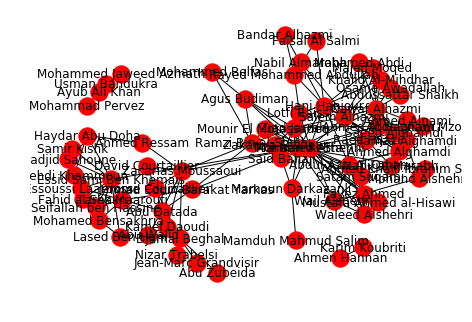

In [48]:
net.draw(g,with_labels=True)
plot.show()

In [49]:
components=net.connected_component_subgraphs(g)
list(list(components)[1])

['Ayub Ali Khan',
 'Mohammed Jaweed Azmath',
 'Usman Bandukra',
 'Mohammad Pervez']

In [50]:
cc = list(components)[0]

IndexError: list index out of range

In [ ]:
import networkx as net
import matplotlib.pyplot as plot
from collections import defaultdict

def plot_multimode(m,layout=net.spring_layout, type_string='type', with_labels=True, filename_prefix='',output_type='pdf'):

    ## create a default color order and an empty color-map
    colors=['r','g','b','c','m','y','k']
    colormap={}
    d=net.degree(m)  #we use degree for sizing nodes
    pos=layout(m)  #compute layout 
    
    #Now we need to find groups of nodes that need to be colored differently
    nodesets=defaultdict(list)
    for n in m.nodes():
        try:
            t=m.node[n][type_string]
        except KeyError:
            ##this happens if a node doesn't have a type_string -- give it a None value
            t='None'
        nodesets[t].append(n)
        
    ## Draw each group of nodes separately, using its own color settings
    print("drawing nodes...")
    i=0
    for key in nodesets.keys():
        ns=[d[n]*100 for n in nodesets[key]]
        net.draw_networkx_nodes(m,pos,nodelist=nodesets[key], node_size=ns, node_color=colors[i], alpha=0.6)
        colormap[key]=colors[i]
        i+=1
        if i==len(colors): 
            i=0  ### wrap around the colormap if we run out of colors
    print(colormap)  
    
    ## Draw edges using a default drawing mechanism
    print("drawing edges...")
    net.draw_networkx_edges(m,pos,width=0.5,alpha=0.5)  
    
    print("drawing labels...")
    if with_labels: 
        net.draw_networkx_labels(m,pos,font_size=12)
    plot.axis('off')
    if filename_prefix is not '':
        plot.savefig(filename_prefix+'.'+output_type)

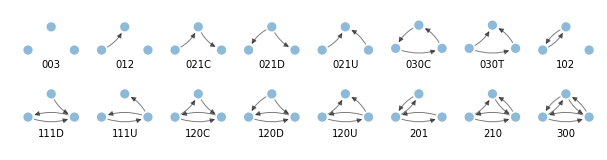

In [55]:
import networkx as net
import triadic
import draw_triads

In [56]:
g=net.DiGraph(net.krackhardt_kite_graph())

In [61]:
census, node_census = triadic.triadic_census(g)
census

{'003': 22.0,
 '012': 0,
 '021C': 0,
 '021D': 0,
 '021U': 0,
 '030C': 0,
 '030T': 0,
 '102': 63,
 '111D': 0,
 '111U': 0,
 '120C': 0,
 '120D': 0,
 '120U': 0,
 '201': 24,
 '210': 0,
 '300': 11}

In [68]:
keys = list(node_census.values())[1].keys()

In [69]:
keys

dict_keys(['003', '012', '102', '021D', '021U', '021C', '111D', '111U', '030T', '030C', '201', '120D', '120U', '120C', '210', '300'])

In [71]:
## A little magic is required to convert ints to strings
print('| Node |', ' | '.join(keys))
for k in node_census.keys():
    print('|', k, '|',' | '.join([str(v) for v in node_census[k].values()]))

| Node | 003 | 012 | 102 | 021D | 021U | 021C | 111D | 111U | 030T | 030C | 201 | 120D | 120U | 120C | 210 | 300
| 0 | 0 | 0 | 14 | 0 | 0 | 0 | 0 | 0 | 0 | 0 | 8 | 0 | 0 | 0 | 0 | 4
| 1 | 0 | 0 | 11 | 0 | 0 | 0 | 0 | 0 | 0 | 0 | 4 | 0 | 0 | 0 | 0 | 3
| 2 | 0 | 0 | 7 | 0 | 0 | 0 | 0 | 0 | 0 | 0 | 4 | 0 | 0 | 0 | 0 | 1
| 3 | 0 | 0 | 7 | 0 | 0 | 0 | 0 | 0 | 0 | 0 | 3 | 0 | 0 | 0 | 0 | 2
| 4 | 0 | 0 | 4 | 0 | 0 | 0 | 0 | 0 | 0 | 0 | 2 | 0 | 0 | 0 | 0 | 0
| 5 | 0 | 0 | 5 | 0 | 0 | 0 | 0 | 0 | 0 | 0 | 1 | 0 | 0 | 0 | 0 | 1
| 6 | 0 | 0 | 3 | 0 | 0 | 0 | 0 | 0 | 0 | 0 | 1 | 0 | 0 | 0 | 0 | 0
| 7 | 0 | 0 | 5 | 0 | 0 | 0 | 0 | 0 | 0 | 0 | 1 | 0 | 0 | 0 | 0 | 0
| 8 | 0 | 0 | 7 | 0 | 0 | 0 | 0 | 0 | 0 | 0 | 0 | 0 | 0 | 0 | 0 | 0
| 9 | 0 | 0 | 0 | 0 | 0 | 0 | 0 | 0 | 0 | 0 | 0 | 0 | 0 | 0 | 0 | 0


In [72]:
census, node_census = triadic.triadic_census(cc)

In [73]:
closed_triads=[[-k,v] for k,v in sorted([[-node_census[k]['300'],k] for k in node_census.keys()])]

In [74]:
closed_triads

[[77, '3arabawy'],
 [66, 'ChangeInLibya'],
 [50, 'Cyrenaican'],
 [26, 'FreedomNow2011'],
 [26, 'monasosh'],
 [24, 'AJArabic'],
 [24, 'EnoughGaddafi'],
 [23, 'monaeltahawy'],
 [21, 'UKguy4justice'],
 [21, 'lemlemz'],
 [20, 'AJEnglish'],
 [20, 'nate_van_iLL'],
 [19, 'marwame'],
 [18, 'Elazul'],
 [18, 'acarvin'],
 [16, '1Seabiscuit'],
 [15, 'Tripolitanian'],
 [15, 'Zeinobia'],
 [14, 'DJMeddi'],
 [14, 'FlightSim95'],
 [14, 'mubaraketganen'],
 [13, 'RamyYaacoub'],
 [13, 'SaloumehZ'],
 [13, 'kalimakhus'],
 [13, 'rstripolina'],
 [12, 'Jeannie_Hartley'],
 [12, 'Madprof666'],
 [12, 'TheNewsBlotter'],
 [12, 'minazekri'],
 [11, 'libyansrevolt'],
 [11, 'manal'],
 [11, 'yasmineelrafie'],
 [10, 'ArabRevolution'],
 [10, 'AymanM'],
 [10, 'BBCWorld'],
 [10, 'Elicoopter_mid'],
 [10, 'alaa'],
 [10, 'exiledsurfer'],
 [10, 'holom10'],
 [10, 'nolanjazeera'],
 [10, 'speak2tweet'],
 [9, 'Freedom4All60'],
 [9, 'Palaestina'],
 [9, 'TerryWitch'],
 [9, 'blogdiva'],
 [9, 'cubanitoencuba'],
 [9, 'shadihamid'],
 [9,

# Cliques

C:\ProgramData\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:126: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  b = plt.ishold()
C:\ProgramData\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:138: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  plt.hold(b)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\__init__.py:917: UserWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  warnings.warn(self.msg_depr_set % key)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\rcsetup.py:152: UserWarning: axes.hold is deprecated, will be removed in 3.0
  warnings.warn("axes.hold is deprecated, will be removed in

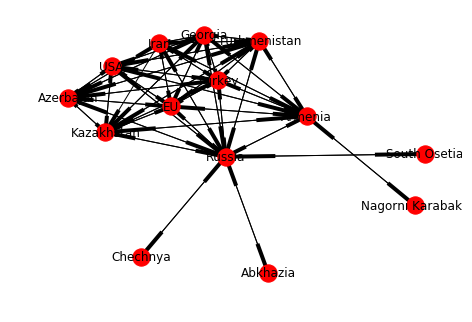

In [80]:
eco=net.read_pajek("economic.net")
net.draw(eco,with_labels=True)
plot.show()

In [85]:
list(net.k_clique_communities(eco,k=4))

NetworkXNotImplemented: not implemented for directed type

In [81]:
e2=trim_edges(eco, weight=0.5)
cliques = list(net.find_cliques(eco))
cliques

NetworkXNotImplemented: not implemented for directed type

In [86]:
net.find_cliques(eco)

NetworkXNotImplemented: not implemented for directed type

# Adjacency Matrix

In [87]:
# Creates a list containing 5 lists, each of 8 items, all set to 0
w, h = 6, 5;
Matrix = [[0 for x in range(w)] for y in range(h)]

In [95]:
nodes1 = ['A','B','C','D','E','F']
nodes2 = [1,2,3,4,5]

In [138]:
T = net.Graph()

In [139]:
T.add_nodes_from(nodes1,bipartite ='people')
T.add_nodes_from(nodes2,bipartite ='party')

In [140]:
T.nodes(data=True)

[('A', {'bipartite': 'people'}),
 ('B', {'bipartite': 'people'}),
 ('C', {'bipartite': 'people'}),
 ('D', {'bipartite': 'people'}),
 ('E', {'bipartite': 'people'}),
 ('F', {'bipartite': 'people'}),
 (1, {'bipartite': 'party'}),
 (2, {'bipartite': 'party'}),
 (3, {'bipartite': 'party'}),
 (4, {'bipartite': 'party'}),
 (5, {'bipartite': 'party'})]

In [141]:
T.add_edge('A',5, weight=1)
T.add_edge('B',1, weight=1)
T.add_edge('C',1, weight=1)
T.add_edge('C',2, weight=1)
T.add_edge('D',2, weight=1)
T.add_edge('D',3, weight=1)
T.add_edge('D',4, weight=1)
T.add_edge('D',5, weight=1)
T.add_edge('E',3, weight=1)
T.add_edge('F',3, weight=1)
T.add_edge('F',4, weight=1)

In [142]:
T.edges(data=True)

[('A', 5, {'weight': 1}),
 ('B', 1, {'weight': 1}),
 ('C', 1, {'weight': 1}),
 ('C', 2, {'weight': 1}),
 ('D', 2, {'weight': 1}),
 ('D', 3, {'weight': 1}),
 ('D', 4, {'weight': 1}),
 ('D', 5, {'weight': 1}),
 ('E', 3, {'weight': 1}),
 ('F', 3, {'weight': 1}),
 ('F', 4, {'weight': 1})]

In [143]:
net.bipartite.projected_graph(T, nodes2).nodes()

[1, 2, 3, 4, 5]

In [144]:
net.bipartite.degree_centrality(T, nodes1) 

{'A': 0.2,
 'B': 0.2,
 'E': 0.2,
 'C': 0.4,
 'D': 0.8,
 'F': 0.4,
 1: 0.3333333333333333,
 2: 0.3333333333333333,
 3: 0.5,
 4: 0.3333333333333333,
 5: 0.3333333333333333}

In [145]:
mat = net.bipartite.biadjacency_matrix(T, row_order=nodes1, 
                                      column_order=nodes2) 

In [146]:
mat.todense()

matrix([[0, 0, 0, 0, 1],
        [1, 0, 0, 0, 0],
        [1, 1, 0, 0, 0],
        [0, 1, 1, 1, 1],
        [0, 0, 1, 0, 0],
        [0, 0, 1, 1, 0]], dtype=int32)

In [147]:
output = mat @ mat.T

In [148]:
output.todense()

matrix([[1, 0, 0, 1, 0, 0],
        [0, 1, 1, 0, 0, 0],
        [0, 1, 2, 1, 0, 0],
        [1, 0, 1, 4, 1, 2],
        [0, 0, 0, 1, 1, 1],
        [0, 0, 0, 2, 1, 2]], dtype=int32)

In [150]:
import csv
import math
import networkx as net
## Import bi-partite (bi-modal) functions
from networkx.algorithms import bipartite as bi
## Read the data from a CSV file
## We use the Universal new-line mode since many CSV files are created with Excel
r=csv.reader(open('campaign_short.csv','r'))
## 2-mode graphs are usually directed. Here, their direction implies money flow
g=net.Graph()
## we need to keep track separately of nodes of all types
pacs=[]
candidates=[]
## Construct a directed graph from edges in the CSV file
for row in r:
    if row[0] not in pacs:
        pacs.append(row[0])
    if row[12] not in candidates:
        candidates.append(row[12])
    g.add_edge(row[0],row[12], weight=int(row[10]))

In [154]:
g.edges(data=True)

[('C00000042', 'S4MO00037', {'weight': 1000}),
 ('C00000042', 'H6IL14095', {'weight': 3000}),
 ('C00000042', 'H6IL06026', {'weight': 1000}),
 ('C00000042', 'H8IL10016', {'weight': 1000}),
 ('C00000042', 'H0IL10120', {'weight': 1000}),
 ('C00000042', 'H8CT05104', {'weight': 1000}),
 ('C00000042', 'H2IL01042', {'weight': 500}),
 ('C00000042', 'H0IL15061', {'weight': 500}),
 ('C00000042', 'S4MI00165', {'weight': 1000}),
 ('C00000042', 'H6IL17106', {'weight': 2000}),
 ('C00000042', 'H2WI05150', {'weight': 500}),
 ('C00000042', 'H0OH08029', {'weight': 500}),
 ('C00000042', 'H8WI00026', {'weight': 1000}),
 ('C00000042', 'H4PA13066', {'weight': 500}),
 ('C00000042', 'H0MD08021', {'weight': 500}),
 ('C00000042', 'H6KY03090', {'weight': 500}),
 ('C00000042', 'H0MT00033', {'weight': 500}),
 ('C00000042', 'H8NY27077', {'weight': 500}),
 ('C00000042', 'H8WI09050', {'weight': 500}),
 ('C00000042', 'H2SC05052', {'weight': 500}),
 ('C00000042', 'H8IL13069', {'weight': 500}),
 ('C00000042', 'S8RI00102

In [196]:
#pacnet=net.bipartite.projected_graph(g, pacs,)
pacnet=bi.weighted_projected_graph(g, pacs, ratio=False)

In [197]:
pacnet=list(net.connected_component_subgraphs(pacnet))[0]

In [198]:
pacnet.edges(data=True)

[('C00000125', 'C00000422', {'weight': 1}),
 ('C00000125', 'C00000059', {'weight': 1}),
 ('C00000125', 'C00000729', {'weight': 1}),
 ('C00000042', 'C00000422', {'weight': 24}),
 ('C00000042', 'C00000059', {'weight': 5}),
 ('C00000042', 'C00000729', {'weight': 17}),
 ('C00000422', 'C00000372', {'weight': 97}),
 ('C00000422', 'C00000059', {'weight': 36}),
 ('C00000422', 'C00000547', {'weight': 3}),
 ('C00000422', 'C00000729', {'weight': 223}),
 ('C00000372', 'C00000059', {'weight': 10}),
 ('C00000372', 'C00000729', {'weight': 65}),
 ('C00000059', 'C00000547', {'weight': 1}),
 ('C00000059', 'C00000729', {'weight': 25}),
 ('C00000547', 'C00000729', {'weight': 1})]

In [199]:
weights = [math.log(edata['weight']) for f,t,edata in pacnet.edges(data=True)]

In [200]:
net.draw_networkx(pacnet,width=weights, edge_color=weights)

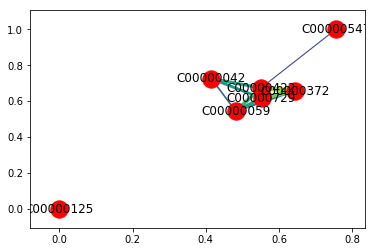

In [201]:
plot.show()

In [203]:
cannet=bi.weighted_projected_graph(g, candidates, ratio=False)
cannet=list(net.connected_component_subgraphs(cannet))[0]
weights=[math.log(edata['weight']) for f,t,edata in cannet.edges(data=True)]
net.draw_networkx(cannet,width=weights, edge_color=weights)

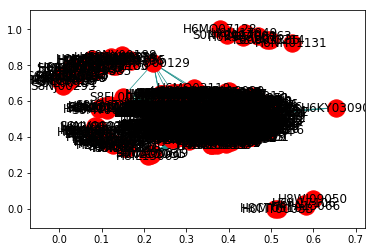

In [204]:
plot.show()

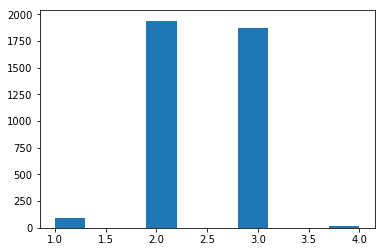

In [209]:
def trim_edges(g, weight=1):
    g2=net.Graph()
    for f, to, edata in g.edges(data=True):
        if edata['weight'] > weight:
            g2.add_edge(f,to,edata)
    return g2
plot.hist(weights)
plot.show()

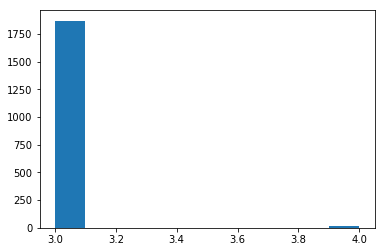

In [212]:
def trim_edges_sub(g, weight=1):
    g2=net.Graph()
    nodes_sub =[]
    for f, to, edata in g.edges(data=True):
        if edata['weight'] > weight:
            #g2.add_edge(f,to,edata)
            nodes_sub.append(f)
            nodes_sub.append(to)
    
    g2 = g.subgraph(nodes_sub)       
    return g2

In [213]:
## The weights histogram is logarithmic;
## we should compute the original weight = e^log_weight
cannet_trim=trim_edges(cannet, weight=math.exp(0.9))
cannet_trim_sub=trim_edges_sub(cannet, weight=math.exp(0.9))

In [218]:
len(cannet_trim.edges(data=True))

1884

In [219]:
len(cannet_trim_sub.edges(data=True))

3916

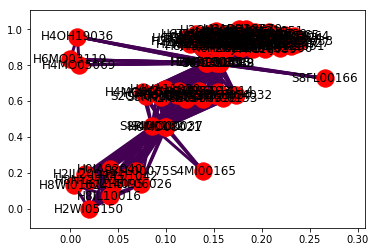

In [220]:
## re-calculate weights based on the new graph
weights=[edata['weight'] for f,t,edata in cannet_trim.edges(data=True)]
net.draw_networkx(cannet_trim,width=weights, edge_color=weights)
plot.show()

In [221]:
net.betweenness_centrality(cannet_trim)

{'H0AL05049': 0.0,
 'H0AR04038': 0.0,
 'H0IA02040': 0.0,
 'H0MD08021': 0.07270985719261579,
 'H0NJ01066': 0.0,
 'H2CA50034': 0.0,
 'H2CT06014': 0.0,
 'H2FL06067': 0.0,
 'H2FL19037': 0.0,
 'H2IL01042': 0.0,
 'H2IL20042': 0.0,
 'H2MA01020': 0.0,
 'H2MD05155': 0.09414838035527692,
 'H2MI05051': 0.0,
 'H2MI17023': 0.0,
 'H2MN02056': 0.0,
 'H2MN06073': 0.0,
 'H2NJ02037': 0.0,
 'H2NJ13075': 0.0,
 'H2NY03089': 0.0,
 'H2NY14037': 0.0,
 'H2NY25017': 0.0,
 'H2OH04032': 0.0,
 'H2OH13033': 0.0,
 'H2PA06080': 0.0,
 'H2PA20065': 0.0,
 'H2TX29030': 0.0,
 'H2WA08075': 0.0,
 'H2WI05150': 0.0,
 'H4IL11096': 0.0,
 'H4IL18059': 0.0,
 'H4MA03022': 0.0,
 'H4MA06033': 0.0,
 'H4MO05069': 0.0,
 'H4MO09046': 0.0,
 'H4NY01055': 0.0,
 'H4OH18079': 0.0,
 'H4OH19036': 0.0,
 'H4PA13017': 0.0,
 'H4PA21051': 0.0,
 'H4RI01034': 0.0,
 'H4VA11020': 0.0,
 'H6AR01072': 0.0,
 'H6CA10088': 0.09414838035527692,
 'H6CA24113': 0.0,
 'H6IL02124': 0.0,
 'H6IL06026': 0.0,
 'H6IL14095': 0.0,
 'H6KS01096': 0.0,
 'H6MA09032': 0.0,
 '

In [222]:
triadic.triadic_census(cannet_trim)

({'003': 15981.0,
  '012': 0,
  '021C': 0,
  '021D': 0,
  '021U': 0,
  '030C': 0,
  '030T': 0,
  '102': 61083,
  '111D': 0,
  '111U': 0,
  '120C': 0,
  '120D': 0,
  '120U': 0,
  '201': 6675,
  '210': 0,
  '300': 29825},
 {'H0AL05049': {'003': 0,
   '012': 0,
   '021C': 0,
   '021D': 0,
   '021U': 0,
   '030C': 0,
   '030T': 0,
   '102': 891,
   '111D': 0,
   '111U': 0,
   '120C': 0,
   '120D': 0,
   '120U': 0,
   '201': 66,
   '210': 0,
   '300': 406},
  'H0AR04038': {'003': 0,
   '012': 0,
   '021C': 0,
   '021D': 0,
   '021U': 0,
   '030C': 0,
   '030T': 0,
   '102': 957,
   '111D': 0,
   '111U': 0,
   '120C': 0,
   '120D': 0,
   '120U': 0,
   '201': 66,
   '210': 0,
   '300': 465},
  'H0IA02040': {'003': 0,
   '012': 0,
   '021C': 0,
   '021D': 0,
   '021U': 0,
   '030C': 0,
   '030T': 0,
   '102': 545,
   '111D': 0,
   '111U': 0,
   '120C': 0,
   '120D': 0,
   '120U': 0,
   '201': 48,
   '210': 0,
   '300': 28},
  'H0MD08021': {'003': 0,
   '012': 0,
   '021C': 0,
   '021D': 0,
   

In [224]:
net.adj_matrix(g).todense()

matrix([[   0, 1000, 3000, ...,    0,    0,    0],
        [1000,    0,    0, ...,    0,    0,    0],
        [3000,    0,    0, ...,    0,    0,    0],
        ..., 
        [   0,    0,    0, ...,    0,    0,    0],
        [   0,    0,    0, ...,    0,    0,    0],
        [   0,    0,    0, ...,    0,    0,    0]], dtype=int32)

In [230]:
nodes1

['A', 'B', 'C', 'D', 'E', 'F']

In [ ]:
net.mini

In [231]:
bet= ['A','B','C','D','E','F','G']

In [233]:
g = net.Graph()

In [236]:
g.add_edge('A','C')
g.add_edge('B','C')
g.add_edge('A','B')
g.add_edge('C','D')
g.add_edge('D','E')
g.add_edge('E','F')
g.add_edge('E','G')
g.add_edge('F','G')

In [241]:
net.betweenness_centrality(g,endpoints=True,normalized=False)

{'A': 6.0, 'B': 6.0, 'C': 14.0, 'D': 15.0, 'E': 14.0, 'F': 6.0, 'G': 6.0}

# Go Viral

In [247]:
class Person(object):
    def __init__(self, id):
#Start with a single initial preference
        self.id=id
        self.i = r.random()
        self.a = self.i
#we value initial opinion and subsequent information equally
        self.alpha=0.8
    def __str__(self):
        return(str(self.id))

In [248]:
density=0.9
g=net.Graph()
## create a network of Person objects
for i in range(10):
    p=Person(i)
    g.add_node(p)
##this will be a simple random graph, every pair of nodes has an
##equal probability of connection
for x in g.nodes():
    for y in g.nodes():
        if r.random()<=density: g.add_edge(x,y)
## draw the resulting graph and color the nodes by their value
col=[n.a for n in g.nodes()]
pos=net.spring_layout(g)
net.draw_networkx(g,pos=pos, node_color=col)

AttributeError: '_csv.reader' object has no attribute 'random'

In [246]:
import random